source: https://note.nkmk.me/en/python-opencv-camera-to-still-image/

source: https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74

In [197]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [198]:
# membuka camera dan mengambil wajah user
# tekan 'q' untuk exit dan tekan 'c' untuk mengambil gambar

import cv2
import os

def save_frame_camera_key(device_num, dir_path, basename, ext = 'jpg', delay = 1, window_name = 'frame'):
    cap = cv2.VideoCapture(device_num)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok = True)
    base_path = os.path.join(dir_path, basename)

    n = 0
    while True:
        ret, frame = cap.read()
        cv2.imshow(window_name, frame)
        key = cv2.waitKey(delay) & 0xFF
        if key == ord('c'):
            cv2.imwrite('{}_{}.{}'.format(base_path, n, ext), frame)
            n += 1
        elif key == ord('q'):
            break

    cv2.destroyWindow(window_name)

# hasil foto dapat dilihat di folder temp yang ada di dalam folder data
save_frame_camera_key(0, 'data/temp', 'camera_capture')

In [199]:
pip install opencv-python scikit-learn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [200]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [201]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import pandas as pd

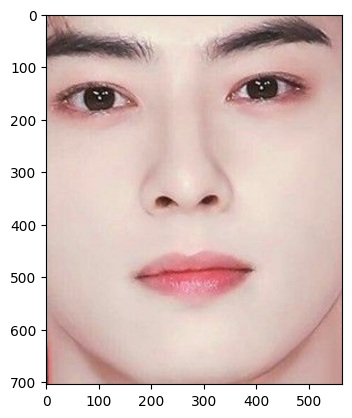

In [202]:
# manually insert image path here
image = cv2.imread(r"C:\Users\verre\OneDrive - Bina Nusantara\Documents\prototypeAI\data\temp\eunwoo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [203]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [204]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [205]:
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [206]:
# load color names from the CSV file
index = ["color", "color_name", "hex", "R", "G", "B"]

# manually insert CSV file path here
csv = pd.read_csv(r'C:\Users\verre\OneDrive - Bina Nusantara\Documents\prototypeAI\colorDataset.csv', names=index, header=None)

In [207]:
# to show the top 5 common colors in the image
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]  
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    
    # match hex colors to color names from the CSV dataset
    color_names = []
    for hex_color in hex_colors:
        color_info = csv[csv['hex'] == hex_color]
        if not color_info.empty:
            color_name = color_info.iloc[0]['color_name']
            color_names.append(color_name)
        else:
            color_names.append(hex_color)
    
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = color_names, colors = hex_colors, autopct='%1.2f%%')
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#c89996', '#4f3938', '#e6d2c9', '#d7bab4', '#a66f6e']


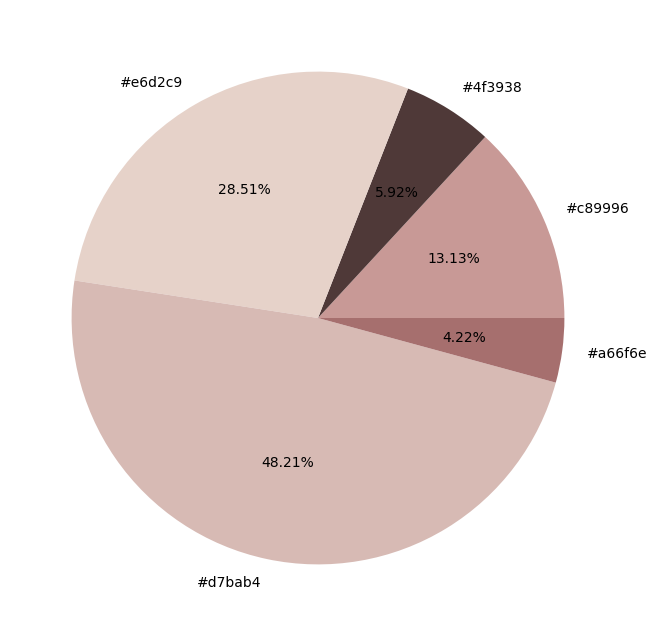

In [208]:
modified_image = prep_image(image)
color_analysis(modified_image)

In [209]:
# to show the most common color in the image
def color_analysis(img):
    clf = KMeans(n_clusters = 1)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]  
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    
    # match hex colors to color names from the CSV dataset
    color_names = []
    for hex_color in hex_colors:
        color_info = csv[csv['hex'] == hex_color]
        if not color_info.empty:
            color_name = color_info.iloc[0]['color_name']
            color_names.append(color_name)
        else:
            color_names.append(hex_color)
    
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = color_names, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#d4b7b1']


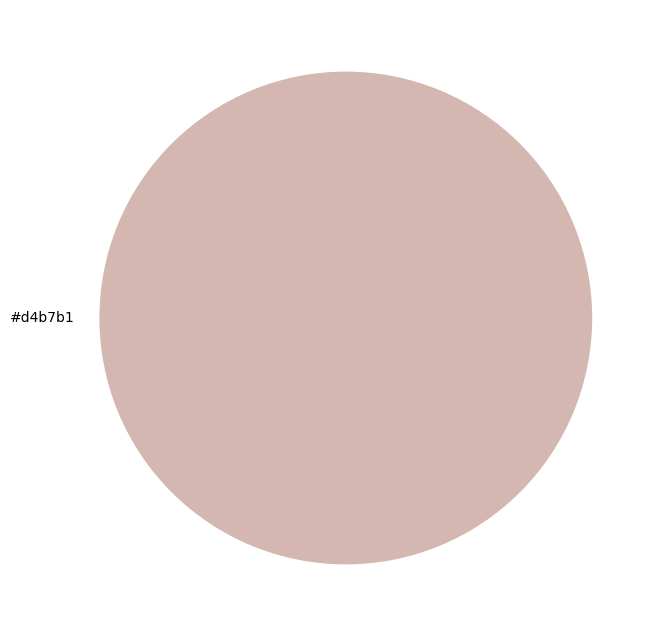

In [210]:
modified_image = prep_image(image)
color_analysis(modified_image)

In [211]:
# to categorize skin color based on the hex code
from colorsys import rgb_to_hls

def rgb_to_hsl(rgb):
    # convert RGB to HSL
    r, g, b = rgb
    h, l, s = rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)
    return h, l, s

def categorize_skin_color(hex_code):
    # convert hex code to RGB values
    rgb = tuple(int(hex_code[i:i + 2], 16) for i in (1, 3, 5))

    # convert RGB to HSL
    hsl = rgb_to_hsl(rgb)

    # extract the lightness component (L)
    l = hsl[1]

    # define thresholds for skin color categories in HSL space
    light_threshold = 0.6
    medium_light_threshold = 0.5
    medium_dark_threshold = 0.3

    # categorize based on HSL
    if l >= light_threshold:
        return "Light Skin"
    elif l >= medium_light_threshold:
        return "Medium Light Skin"
    elif l >= medium_dark_threshold:
        return "Medium Dark Skin"
    else:
        return "Dark Skin"

# manually insert the most common color in the image from the previous result
# example of hex code: #a96952
hex_code = '#d4b7b1'

# categorize the hex code into a skin color type
skin_color_category = categorize_skin_color(hex_code) 

# output is Hex Code and Skin Color Category
print("Hex Code:", hex_code)
print("Skin Color Category:", skin_color_category)

Hex Code: #d4b7b1
Skin Color Category: Light Skin


In [212]:
# to categorize skin undertones based on the hex code
def categorize_skin_undertone(hex_code):
    # convert hex code to RGB values
    rgb = tuple(int(hex_code[i:i + 2], 16) for i in (1, 3, 5))

    # extract individual RGB values
    r, g, b = rgb

    # define color ranges for cool, warm, and neutral undertones
    cool_range = (215, 170, 150)
    warm_range = (225, 180, 130)
    neutral_range = (220, 165, 110)

    # calculate the Euclidean distance to each range
    cool_distance = sum((a - b) ** 2 for a, b in zip(rgb, cool_range)) ** 0.5
    warm_distance = sum((a - b) ** 2 for a, b in zip(rgb, warm_range)) ** 0.5
    neutral_distance = sum((a - b) ** 2 for a, b in zip(rgb, neutral_range)) ** 0.5

    # categorize based on the minimum distance
    min_distance = min(cool_distance, warm_distance, neutral_distance)

    if min_distance == cool_distance:
        return "Cool Undertone"
    elif min_distance == warm_distance:
        return "Warm Undertone"
    else:
        return "Neutral Undertone"
        
# categorize the hex code into a skin undertone type
undertone_category = categorize_skin_undertone(hex_code)

# output is Hex Code and Skin Undertone Category
print("Hex Code:", hex_code) 
print("Skin Undertone Category:", undertone_category)

Hex Code: #d4b7b1
Skin Undertone Category: Cool Undertone


In [213]:
# to categorize the seasonal category of the user based on the hex code
def categorize_season(hex_code):
    # Convert hex code to RGB values
    rgb = tuple(int(hex_code[i:i + 2], 16) for i in (1, 3, 5))

    # Calculate color characteristics
    r, g, b = rgb
    total_intensity = r + g + b
    red_proportion = r / total_intensity
    green_proportion = g / total_intensity

    # Categorize hex code into 16 seasonal color types
    if total_intensity > 500 and red_proportion > 0.4:
        return "Winter Deep"
    elif total_intensity > 500 and green_proportion > 0.4:
        return "Winter Cool"
    elif 400 < total_intensity < 500 and red_proportion > 0.4:
        return "Winter Light"
    elif 400 < total_intensity < 500 and green_proportion > 0.4:
        return "Winter Soft"
    elif total_intensity > 500 and 0.3 <= red_proportion <= 0.6:
        return "Spring Clear"
    elif total_intensity > 500 and red_proportion > 0.6:
        return "Spring Warm"
    elif 400 < total_intensity < 500 and 0.3 <= red_proportion <= 0.6:
        return "Spring Light"
    elif 400 < total_intensity < 500 and red_proportion > 0.6:
        return "Spring Soft"
    elif total_intensity < 400 and red_proportion < 0.3 and green_proportion < 0.3:
        return "Summer Cool"
    elif 400 < total_intensity < 500 and red_proportion < 0.3 and green_proportion < 0.3:
        return "Summer Light"
    elif 400 < total_intensity < 500 and 0.3 <= red_proportion <= 0.6:
        return "Summer Soft"
    elif total_intensity > 500 and red_proportion < 0.3 and green_proportion < 0.3:
        return "Summer Deep"
    elif total_intensity < 400 and 0.3 <= red_proportion <= 0.6:
        return "Autumn Warm"
    elif 400 < total_intensity < 500 and 0.3 <= red_proportion <= 0.6:
        return "Autumn Soft"
    elif total_intensity > 500 and 0.3 <= red_proportion <= 0.6:
        return "Autumn Deep"
    elif total_intensity > 500 and red_proportion < 0.3:
        return "Autumn Clear"

seasonal_category = categorize_season(hex_code)

# output is the seasonal category of the user
print("Hex Code:", hex_code) 
print("Seasonal Category:", seasonal_category)

Hex Code: #d4b7b1
Seasonal Category: Spring Clear
